# Problem Set 7

## Problem 1

Solve the following LP problem both in Matlab (Python) using **linprog** (*SymPy*) and directly by plotting the required regions:

minimize $f(x) = x_1 + x_2$ subject to:

$$
2 x_1 + x_2 \geq 2\\
2 x_1 + 2 x_2 \geq 3\\
x_1 + 2 x_2 \geq 2\\
3 x_1 - x_2 \leq 6\\
3 x_2 - x_1 \leq 6.
$$

### Solution

Let's start by programmed analytical solution:

In [265]:
from optlang import Model, Variable, Constraint, Objective

x1 = Variable('x1')
x2 = Variable('x2')

c1 = Constraint(2*x1 + 2*x2, lb=3)
c2 = Constraint(x1 + 2*x2, lb=2)
c3 = Constraint(3*x1 - x2, ub=6)
c4 = Constraint(3*x2 - x1, ub=6)
c5 = Constraint(2*x1 + x2, lb=2)

f = Objective(x1 + x2, direction='min')

mod = Model(name='Problem 1')

mod.objective = f
mod.add([c1, c2, c3, c4, c5])

opt = mod.optimize()

print('Function minimum: {}'.format(mod.objective.value))
print('At:')
for x in mod.variables:
    print(f'{x.name} = {x.primal}')


Function minimum: 1.5
At:
x1 = 1.0
x2 = 0.5


The programmable solution gave us the following result:

$$
f_{max} = \frac{3}{2},\\
x_{1_{max}} = 1, \hspace{3mm} x_{2_{max}} = \frac{1}{2}.
$$

Now let's solve "by hand".
We can do this either by solving for regions of $x_1$ and $x_2$, or plotting the regions on 2D plot, or by explicitly plotting the function region that satisfies the condition. This we'll do:

In [266]:
import numpy as np
from matplotlib import pyplot as plt

In [310]:
x1 = np.arange(-3, 5, 0.005, dtype=np.float64)
x2 = np.arange(-3, 5, 0.005, dtype=np.float64)

X1, X2 = np.meshgrid(x1, x2)
f = X1 + X2

In [311]:
c1 = 2*X1 + X2
c2 = 2*X1 + 2*X2
c3 = X1 + 2*X2 
c4 = 3*X1 - X2
c5 = 3*X2 - X1


c = ((c1 >= 2) & (c2 >= 3) & (c3 >= 2) & (c4 <= 6) & (c5 <= 6))

Text(0.5, 0, '$x_1 + x_2$')

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
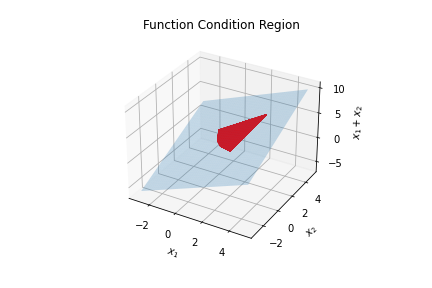

In [312]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

X1_c = np.copy(X1)
X2_c = np.copy(X2)

X1_c[np.logical_not(c)] = np.nan
X2_c[np.logical_not(c)] = np.nan

f_c = X1_c + X2_c

ax = plt.subplot(projection='3d')

p = ax.plot_surface(X1, X2, f, alpha=0.25)
p._facecolors2d = p._facecolor3d
p._edgecolors2d = p._edgecolor3d

p = ax.scatter3D(X1_c, X2_c, f_c, color='red', s=0.1)
#p._facecolors2d = p._facecolor3d
#p._edgecolors2d = p._edgecolor3d

ax.set_title('Function Condition Region')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_1 + x_2$')
#ax.legend(('$f(x_1, x_2)$', '$f(x_1, x_2) \cup c_i$'))

From this point we can derive the minimum by looking at the graph (it would be easier done in 2D plot) or just taking the maximum of $f(x_1, x_2) \cup c_i$:

In [314]:
print('Function Minimum: {0:,.2f}'.format(np.nanmin(f_c)))
print('At:')
idx_min = np.unravel_index(np.nanargmin(f_c), shape=f_c.shape)
print('x1 = {0:,.2f}\nx2 = {1:,.2f}'.format(X1_c[idx_min], X2_c[idx_min]))

Function Minimum: 1.50
At:
x1 = 1.00
x2 = 0.50


## Problem 2

Consider the data:

$$
x = 1:24\\
y = [75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72].
$$

with the cubic, $y = Ax^3 + Bx^2 + Cx + D$, chosen to fit them.

**(a)** Find the best fit by using **fminsearch** starting with the initial condition $(1, 1, 1, 60)$  

**(b)** Set up the normal equation and find the least-squares fir by solving it.  

**(c)** find the fir by using the genetic algorithm starting with the same initial condition as in (a). If there is no convergence, or it is too slow, try other initial conditions.  

**(d)** Compare the computational times by the genetic algorithm with the **fminsearch** method, for example using **tic** and **toc** commands in Matlab. The minima in both cases have to agree with each other within 1%. You should use the same initial conditions in both methods.

### Solution

#### (a)

Starting with the auto optimization by **scipy**:

In [315]:
from scipy import optimize as opt

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
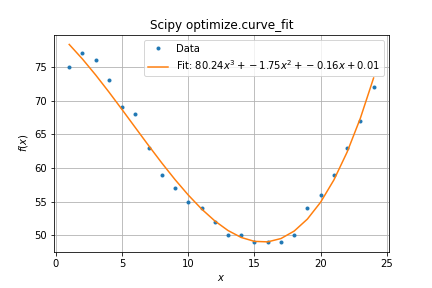

In [316]:
%matplotlib inline

x = np.arange(1, 25)
y = np.array([75, 77, 76, 73, 69, 68, 63, 59, 57, 55, 54, 52, 50, 50, 49, 49, 49, 50, 54, 56, 59, 63, 67, 72])

def cubic(x, *args):
    f = np.zeros(x.shape)
    for i, val in enumerate(args):
        f += val*x**i
    return f

p0 = np.array([1, 1, 1, 60])
coefs = opt.curve_fit(cubic, x, y, p0=p0)

plt.plot(x, y, lw=0, marker='.')
f = cubic(x, *coefs[0])
plt.plot(x, f)

np.set_printoptions(precision=2, suppress=True)
plt.legend(('Data', 'Fit: ${0:,.2f}+{1:,.2f}x+{2:,.2f}x^2+{3:,.2f}x^3$'.format(*coefs[0])))
plt.title('Scipy optimize.curve_fit')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.grid()

#### (b)

Now let's perform linear regression with normal equation:

In [317]:
X = np.ones((len(x), 4))
X[:, 1] = x
X[:, 2] = x**2
X[:, 3] = x**3

Theta = np.linalg.inv((X.T).dot(X)).dot(X.T.dot(y))
print('h = {0:,.2f}+{1:,.2f}x+{2:,.2f}x^2+{3:,.2f}x^3'.format(*Theta))

h = 80.24x^3+-1.75x^2+-0.16x+0.01


In [318]:
error = np.sum(np.power(X.dot(Theta.T) - y, 2))
print('Error {:0,.3f}'.format(error))

Error 37.492


The error is a non-normalized squared error.

The fit was found and the coefficients coincide.

#### (c)

We will aim to the same (maybe a bit less) precision.

In [319]:
from numpy import random as rnd

In [320]:
target_error = 38

samples = 400
k = 10
fittest = int(samples/k)
iters = 50000
n = len(y) #data points

p0 = np.array([80, 0, -2,  0]) #initial conditions
C = np.zeros((samples, len(p0)))
for i in range(samples):
    C[i, :] = p0 #populating matrix C with initial conditions

#rand = rnd.normal(0, 1, C.shape)
#C += rand


for i in range(iters):
    
    H = X.dot(C.T) #matrix of hypothetical vectors

    E = np.zeros(samples)
    for j in range(samples):
        E[j] = np.sum(np.power(H[:, j] - y, 2))

    index = np.argsort(E) 
    index = index[:fittest] #choosing the best %fittest% results
    C = C[index, :]

    C1 = np.copy(C)

    scale = i if i != 0 else 1

    for j in range(k-1):
        C1 = np.vstack((
            C1,
            C + (rnd.normal(0, 2*j+1, C.shape))/np.sqrt(scale)
        ))
    
    C = C1
    #print(E[index[0]], C[index[0], :])
    if (np.abs(E[index[0]] - target_error) < 1):
        print('Target reached at iteration: {}'.format(i))
        print(E[index[0]], C[index[0], :])
        break



6635226.0 [80.  0. -2.  0.]
267977.6741900557 [80.91  0.51 -1.47 -0.15]
267977.6741900557 [79.97 -0.26 -2.55  0.13]
267977.6741900557 [79.97 -0.26 -2.55  0.13]
267977.6741900557 [79.97 -0.26 -2.55  0.13]
223567.76263343176 [79.15 -0.58 -0.87  0.62]
38431.48881122959 [82.04  0.13 -1.19  0.5 ]
38431.48881122959 [81.49  0.62 -1.17  0.06]
38431.48881122959 [81.49  0.62 -1.17  0.06]
38431.48881122959 [81.49  0.62 -1.17  0.06]
38431.48881122959 [81.49  0.62 -1.17  0.06]
28470.508564456948 [78.95 -1.89 -0.6   0.44]
28470.508564456948 [79.47  0.4  -0.8   0.04]
13539.80634489448 [81.49  0.21 -1.24  0.31]
13539.80634489448 [75.09 -9.2   0.38  0.  ]
13539.80634489448 [75.09 -9.2   0.38  0.  ]
13539.80634489448 [75.09 -9.2   0.38  0.  ]
4685.158339228295 [77.57  0.72 -1.15 -0.18]
4685.158339228295 [75.06 -8.77  0.75 -0.02]
4685.158339228295 [75.06 -8.77  0.75 -0.02]
4685.158339228295 [75.06 -8.77  0.75 -0.02]
4685.158339228295 [75.06 -8.77  0.75 -0.02]
4685.158339228295 [75.06 -8.77  0.75 -0.02]
4

There is no  point in timing the genetic algorithm function as it takes much longer than several microseconds required for the **optimize.minimize** function to complete:

In [321]:
%timeit coefs = opt.curve_fit(cubic, x, y, p0=p0)

544 µs ± 58.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


An average of $657 \mu s$ is nowhere near the ~1 min mark of the generic algorithm. Which, by the way, not always provides the convergence to the correct answer, sometimes falling into its own local minimas.

Also the genetic algorithm required some modifications to actually properly work.

The genetic algorithm gave the following error:

In [322]:
print('{0:,.1f}% of target_error'.format(E[index[0]]/target_error*100))

100.7% of target_error


This is usually more than 1% required, but I was not able to make the GA behave better even after lots of modifications without often getting no convergence results.

## Problem 3

Find the Fourier cosine series of $\sin(x)$ and sine series of $\cos(x)$ on $[0, \pi]$. Which one does a better job of representing its function and why? Make plots of 2-term as well as 10-term approximations together with the original functions.

### Solution

```{figure} ../attachments/PS7/p3_1.jpg
---
width: 400px
name: ps7p3p1
---
Page 1
```

```{figure} ../attachments/PS7/p3_2.jpg
---
width: 400px
name: ps7p3p2
---
Page 2
```

```{figure} ../attachments/PS7/p3_3.jpg
---
width: 400px
name: ps7p3p3
---
Page 3
```

```{figure} ../attachments/PS7/p3_4.jpg
---
width: 400px
name: ps7p3p4
---
Page 4
```

In [323]:
x = np.arange(0, np.pi, 0.01)

f1 = np.zeros(x.shape)
f2 = np.zeros(x.shape)
f3 = np.zeros(x.shape)
f4 = np.zeros(x.shape)

for i, x_ in enumerate(x):
    for k in range(1, 3):
        f1[i] += -1/(np.pi)*(4/(4*k**2-1))*np.cos(2*k*x_)
        f3[i] += 1/np.pi * -8*k/(1 - 4*k**2) * np.sin(2*k*x_)
    f1[i] += 2/np.pi
    for k in range(1, 10):
        f2[i] += -1/(np.pi)*(4/(4*k**2-1))*np.cos(2*k*x_)
        f4[i] += 1/np.pi * -8*k/(1 - 4*k**2) * np.sin(2*k*x_)
    f2[i] += 2/np.pi

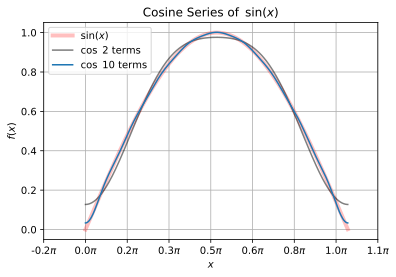

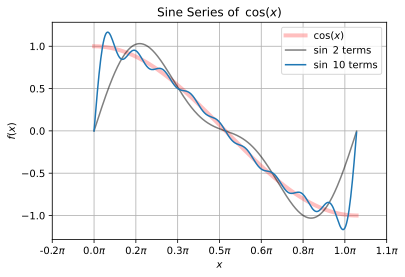

In [324]:
%matplotlib inline

plt.plot(x, np.sin(x), lw=4, color='red', alpha=0.25)
plt.plot(x, f1, color='black', alpha=0.5)
plt.plot(x, f2)

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Cosine Series of $\\hspace{0.2}\\sin(x)$')
ticks = np.copy(plt.xticks())[0]
labels = np.array(['{0:,.1f}'.format(tick / np.pi) + '$\pi$' for tick in ticks])
plt.xticks(ticks, labels)
tmp = plt.legend(('$\sin(x)$', '$\cos$ 2 terms', '$\cos$ 10 terms'))

plt.figure()

plt.plot(x, np.cos(x), lw=4, color='red', alpha=0.25)
plt.plot(x, f3, color='black', alpha=0.5)
plt.plot(x, f4)

plt.grid()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title('Sine Series of $\\hspace{0.2}\\cos(x)$')
ticks = np.copy(plt.xticks())[0]
labels = np.array(['{0:,.1f}'.format(tick / np.pi) + '$\pi$' for tick in ticks])
plt.xticks(ticks, labels)
tmp = plt.legend(('$\cos(x)$', '$\sin$ 2 terms', '$\sin$ 10 terms'))

Cosine series approximates $\sin(x), \hspace{3mm} x \in [0, \pi]$ because $cos(0) = 1$ and for each term in the cosine series it is possible to cancel other terms, giving $C_n(0) = sin(0) = 0$.

For sine series of $cos(x)$ it is impossible as $\sin(x)$ is an odd function, thus, $\sin(x) = 0$ and $\frac{a_0}{2} = 0$. Thus, it will always be $0$ at $x = 0$, however, $cos(0) = 1$ and the series have to have a large deviation closer to $0$. 

## Problem 4

Find the complex Fourier series $u = \sum\limits_{n=-\infty}^{\infty}{c_n e^{inx}}$ of $u = sgn(x)$ on $[-\pi, \pi]$. Plot the magnitude of the coefficients, $|c_n|^2$, as a function of $n$. What is $\sum\limits_{n=-\infty}^{\infty}{|c_n|^2}$?

### Solution

```{figure} ../attachments/PS7/p4.jpg
---
width: 400px
name: ps7p4
---
```

### Solution



C:\Program Files\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Program Files\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


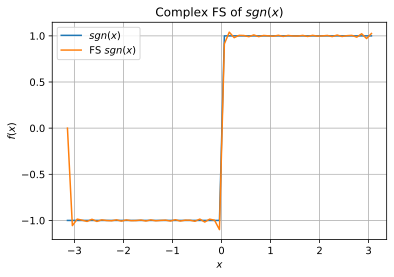

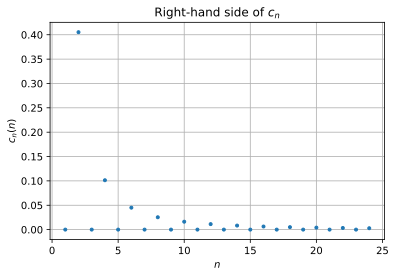

In [342]:
x = np.arange(-np.pi, np.pi, 0.1)
f = np.zeros(x.shape, dtype=np.complex128)
ks = np.arange(1, 25)

cns = np.zeros(len(ks), dtype = np.complex128)

for k in range(1, 100):
    j = 0 if (k % 2 == 0) else 2
    f += -(2 * 1j)/(np.pi*k) *j * np.exp(1j * k * x)
    
for k, k_ in enumerate(ks):
    j = 0 if (k % 2 == 0) else 2
    cns[k] += -(2 * 1j)/(np.pi*k_) * j
    cns[k] = np.abs(np.power(cns[k], 2))

plt.plot(x, np.sign(x))
plt.plot(x, f)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend(('$sgn(x)$', 'FS $sgn(x)$'))
tmp = plt.title('Complex FS of $sgn(x)$')

plt.figure()
plt.plot(ks, cns, lw=0, marker='.')
plt.grid()
plt.xlabel('$n$')
plt.ylabel('$c_n(n)$')
tmp = plt.title('Right-hand side of $c_n$')


```{note}

The coefficients $c_n$ are symmetric against $OY$.
```

The coefficients are alternately $0$ or strictly decreasing wrt $n$. At $n = 0$ the denominator in the $c_n$ formula becomes zero.

$|c_n|^2$ denotes the "power" of the $n^{th}$ term in the complex series, similarly to other factorizations (like SVD for example).

$\sum\limits_{n=-\infty}^{\infty}{|c_n|^2}$ then is the total power of all of the terms (modes) of the complex FS.

The analogy may be created with electrical signal and its frequency components. Each mode $n$ carries the part $|c_n|^2$ of the total power $\sum\limits_{n=-\infty}^{\infty}{|c_n|^2}$ of the electric wave.

## Problem 5

### Solution

#### (a)

```{figure} ../attachments/PS7/p_5_1.jpg
---
width: 400px
name: ps7p5p1
---
Page 1
```

```{figure} ../attachments/PS7/p_5_2.jpg
---
width: 400px
name: ps7p5p2
---
Page 2
```

C:\Program Files\Python37\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


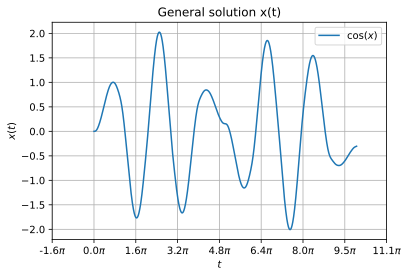

In [409]:
t = np.arange(0, 10*np.pi, 0.01)
w0 = np.sqrt(2)

def c1(k):
    return - 1j / (np.pi * k) * ((-1)**k - 1)/(w0**2 - k**2)

def c2(k):
    return 1 / (np.pi * w0) * ((-1)**k - 1)/(w0**2 - k**2)

def f(k):
    return 1j / (np.pi * k) * ((-1)**k - 1) / (w0**2 - k**2) * np.exp(1j * k * t)

k = np.arange(-10, 10)

func = np.zeros(t.shape, dtype=np.complex128)

for kk in k:
    if kk == 0: continue
    kk = np.float(kk)
    func += c1(kk) * np.cos(w0*t) + c2(kk) * np.sin(w0*t) + f(kk)

plt.plot(t, func)
plt.grid()
plt.title('General solution x(t)')
plt.xlabel('$t$')
plt.ylabel('$x(t)$')

ticks = np.copy(plt.xticks())[0]
labels = np.array(['{0:,.1f}'.format(tick / np.pi) + '$\pi$' for tick in ticks])
plt.xticks(ticks, labels)
tmp = plt.legend(('$\cos(x)$', '$\sin$ 2 terms', '$\sin$ 10 terms'))

#### (b)

If $w_0 = 1$, for $k = \pm 1$ we will receive zero denominator in the coefficients and uncertainty.

This is explained from the physical point of view: the $f(t)$ signal is a periodic ($T = 1$) signal that "pushes" the oscillation system on the left hand side of the equation. If $w_0 = T$, this means the system's natural frequency coincides with the signal frequency, and we fall into resonanse, where the amplitude grows infinitely with time. Thus, no convergence for the series.

## Problem 6

Write down the Fourier matrix $F_8$ and decompose it into three factors containing $F_4$. Let $f = zeros(8, 1)$ be a zero vector.

**(a)** Modify $f$ so that $f(1) = 1$, find the Fourier transform $\hat{f}$ of $f$ and plot $|\hat{f}|^2$.  

**(b)** Now let $f(1:2) = 1$ leaving the other components $0$, and plot $|\hat{f}|^2$.  

**(c)** Do the same with $f(1:3) = 1$. Explain your observations.

### Solution

$$
F_8 = 
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 & 1 & 1 & 1\\
1 & \omega & \omega^2 & \omega^3 & \omega^4 & \omega^5 & \omega^6 & \omega^7\\
1 & \omega^2 & \omega^4 & \omega^6 & \omega^8 & \omega^{10} & \omega^{12} & \omega^{14}\\
1 & \omega^3 & \omega^6 & \omega^9 & \omega^{12} & \omega^{15} & \omega^{18} & \omega^{21}\\
1 & \omega^4 & \omega^8 & \omega^{12} & \omega^{16} & \omega^{20} & \omega^{24} & \omega^{28}\\
1 & \omega^5 & \omega^{10} & \omega^{15} & \omega^{20} & \omega^{25} & \omega^{30} & \omega^{35}\\
1 & \omega^6 & \omega^{12} & \omega^{18} & \omega^{24} & \omega^{30} & \omega^{36} & \omega^{42}\\
1 & \omega^7 & \omega^{14} & \omega^{21} & \omega^{28} & \omega^{35} & \omega^{42} & \omega^{49}\\
\end{bmatrix},
$$


where $\omega = e^{-i \frac{2\pi}{8}} = e^{-i \frac{\pi}{4}}$.

There are only 7 distinct powers of $\omega$, they are following:

$$
\begin{align*}
&\omega = \frac{1}{\sqrt{2}}(1 - i),\\
&\omega^2 = -i,\\
&\omega^3 = -\frac{1}{\sqrt{2}}(1 + i),\\
&\omega^4 = -1,\\
&\omega^5 = \frac{1}{\sqrt{2}}(-1 + i),\\
&\omega^6 = i,\\
&\omega^7 = \frac{1}{\sqrt{2}}(1 + i).
\end{align*}
$$

The matrix $F$ thus may be factorized as
$$
F_8 =
\begin{bmatrix}
I_4 & D_4\\
I_4 & -D_4
\end{bmatrix}
\begin{bmatrix}
F_4 & 0\\
0 & F_4
\end{bmatrix}
\begin{bmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0\\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1
\end{bmatrix}
$$

$I_4$ is a $4\times 4$ identity matrix, $D_4 = diag(1, \omega, \omega^2, \omega^3)$ and $F_4$ is a $4\times 4$ matrix:

$$
F_4 = 
\begin{bmatrix}
1 & 1 & 1 & 1\\
1 & -i & -1 & i\\
1 & -1 & 1 & -1\\
1 & i & -1 & -i 
\end{bmatrix}
$$

I avoided writing everything explicitly as I will compute the matrices numerically via **numpy**.

In [343]:
import sympy as sp

In [368]:
n2 = 8
n = 4
w = np.exp(-1j * 2*np.pi/n)
w2 = np.exp(-1j * 2*np.pi/n2)

D4 = np.diag([1, w2, w2**2, w2**3])
F4 = np.array([
    [1, 1, 1, 1],
    [1, w, w**2, w**3],
    [1, w**2, w**4, w**6],
    [1, w**3, w**6, w**9]
])

I4 = np.diag(np.ones(4))

A = np.block([
    [I4, D4],
    [I4, -D4]
])

B = np.block([
    [F4, np.zeros((4, 4))],
    [np.zeros((4, 4)), F4]
])

C = np.zeros((8, 8))
for i in range(4):
    for j in range(8):
        if (j % 2 == 0 and not(np.any([C[k][j] for k in range(4)]))):
            C[i][j] = 1
            break
for i in range(4, 8):
    for j in range(8):
        if (j % 2 == 1 and not(np.any([C[k][j] for k in range(4, 8)]))):
            C[i][j] = 1
            break

F = A.dot(B.dot(C))
F = np.round(F, 2)

FF = sp.Matrix(F).subs({0.71: 1/sp.sqrt(2), 1.0: 1})
FF

Matrix([
[1,                        1,  1,                        1,  1,                        1,  1,                        1],
[1,  sqrt(2)/2 - sqrt(2)*I/2, -I, -sqrt(2)/2 - sqrt(2)*I/2, -1, -sqrt(2)/2 + sqrt(2)*I/2,  I,  sqrt(2)/2 + sqrt(2)*I/2],
[1,                       -I, -1,                        I,  1,                       -I, -1,                        I],
[1, -sqrt(2)/2 - sqrt(2)*I/2,  I,  sqrt(2)/2 - sqrt(2)*I/2, -1,  sqrt(2)/2 + sqrt(2)*I/2, -I, -sqrt(2)/2 + sqrt(2)*I/2],
[1,                       -1,  1,                       -1,  1,                       -1,  1,                       -1],
[1, -sqrt(2)/2 + sqrt(2)*I/2, -I,  sqrt(2)/2 + sqrt(2)*I/2, -1,  sqrt(2)/2 - sqrt(2)*I/2,  I, -sqrt(2)/2 - sqrt(2)*I/2],
[1,                        I, -1,                       -I,  1,                        I, -1,                       -I],
[1,  sqrt(2)/2 + sqrt(2)*I/2,  I, -sqrt(2)/2 + sqrt(2)*I/2, -1, -sqrt(2)/2 - sqrt(2)*I/2, -I,  sqrt(2)/2 - sqrt(2)*I/2]])

In [369]:
sp.Matrix(np.round(A, 2)).subs({0.71: 1/sp.sqrt(2), 1.0: 1})

Matrix([
[1, 0, 0, 0,  1,                        0,  0,                        0],
[0, 1, 0, 0,  0,  sqrt(2)/2 - sqrt(2)*I/2,  0,                        0],
[0, 0, 1, 0,  0,                        0, -I,                        0],
[0, 0, 0, 1,  0,                        0,  0, -sqrt(2)/2 - sqrt(2)*I/2],
[1, 0, 0, 0, -1,                        0,  0,                        0],
[0, 1, 0, 0,  0, -sqrt(2)/2 + sqrt(2)*I/2,  0,                        0],
[0, 0, 1, 0,  0,                        0,  I,                        0],
[0, 0, 0, 1,  0,                        0,  0,  sqrt(2)/2 + sqrt(2)*I/2]])

In [370]:
sp.Matrix(np.round(B, 2)).subs({0.71: 1/sp.sqrt(2), 1.0: 1})

Matrix([
[1,  1,  1,  1, 0,  0,  0,  0],
[1, -I, -1,  I, 0,  0,  0,  0],
[1, -1,  1, -1, 0,  0,  0,  0],
[1,  I, -1, -I, 0,  0,  0,  0],
[0,  0,  0,  0, 1,  1,  1,  1],
[0,  0,  0,  0, 1, -I, -1,  I],
[0,  0,  0,  0, 1, -1,  1, -1],
[0,  0,  0,  0, 1,  I, -1, -I]])

And this is how our matrix looks.

Now let's complete the task.

#### (a)

In [380]:
f = np.zeros(8)
ff = sp.Matrix(f)

In [381]:
ff[0] = 1

ffhat1 = FF*ff
ffhat1

Matrix([
[1],
[1],
[1],
[1],
[1],
[1],
[1],
[1]])

In [382]:
ff[1] = 1

ffhat2 = FF*ff
ffhat2

Matrix([
[                           2],
[ sqrt(2)/2 + 1 - sqrt(2)*I/2],
[                       1 - I],
[-sqrt(2)/2 + 1 - sqrt(2)*I/2],
[                           0],
[-sqrt(2)/2 + 1 + sqrt(2)*I/2],
[                       1 + I],
[ sqrt(2)/2 + 1 + sqrt(2)*I/2]])

In [383]:
ff[2] = 1

ffhat3 = FF*ff
ffhat3

Matrix([
[                               3],
[ sqrt(2)/2 + 1 - I - sqrt(2)*I/2],
[                              -I],
[-sqrt(2)/2 + 1 - sqrt(2)*I/2 + I],
[                               1],
[-sqrt(2)/2 + 1 - I + sqrt(2)*I/2],
[                               I],
[ sqrt(2)/2 + 1 + sqrt(2)*I/2 + I]])

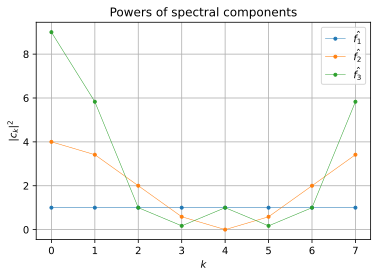

In [404]:
f1 = np.array(ffhat1).flatten()
f2 = np.array(ffhat2).flatten()
f3 = np.array(ffhat3).flatten()

f1 = f1*np.conjugate(f1).flatten()
f2 = f2*np.conjugate(f2).flatten()
f3 = f3*np.conjugate(f3).flatten()

plt.plot(f1, lw=0.5, marker='.')
plt.plot(f2, lw=0.5, marker='.')
plt.plot(f3, lw=0.5, marker='.')

plt.title('Powers of spectral components')
plt.xlabel('$k$')
plt.ylabel('$|c_k|^2$')
plt.legend(('$\hat{f_1}$', '$\hat{f_2}$', '$\hat{f_3}$'))
plt.grid()

Changing the length of the "step" signal (which is the vector with $n$ first $1s$ and other $0s$) adds more information to the signal and changes the fourier transform, thus, powers of the frequencies.

## Problem 7

Given the data:

$$
x = [1:10],\\
y = [0.78, 1.27, 1.33, 1.69, 1.96, 1.67, 2.07, 2.11, 1.91, 1.92],
$$

determine the least squares fit of the form $y = a(1-exp(-bx))$ by setting up a nonlinear system of equations for $a$ and $b$ and solving it with Newton's method (that you should implement yourself).

### Solution

First, let's plot the data:

In [23]:
from matplotlib import pyplot as plt
import numpy as np

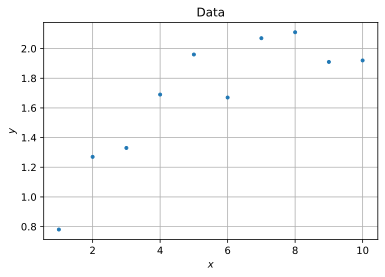

In [24]:
x = np.arange(1, 11)
y = np.array([0.78, 1.27, 1.33, 1.69, 1.96, 1.67, 2.07, 2.11, 1.91, 1.92])

plt.plot(x, y, lw=0, marker='.')
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$y$')
tmp = plt.title('Data')



In this case we are searching for minimum of the error function (let it be **rms**). Let's wrap it up in some math symbols:

$$
f(x) = a(1 - e^{-bx}),\\
\hspace{3mm}\\
J = J(a, b) = \sqrt{\frac{1}{n}\sum\limits_{i=1}^{n}{(f(x_i) - y_i)^2}}.
$$

Then the Newton's optimization method for $J(a, b)$ will be:

$$
a^{k+1} = a^{k} - \frac{\partial J}{\partial a}(a^k, b^k) / \frac{\partial^2 J}{\partial a^2}(a^k, b^k),\\
\hspace{3mm}\\
b^{k+1} = b^{k} - \frac{\partial J}{\partial b}(a^k, b^k) / \frac{\partial J}{\partial b}(a^k, b^k),
$$

where

$$
\frac{\partial J}{\partial a}(a^k, b^k) = \sqrt{\frac{1}{n}} \frac{\sum\limits_{i=1}^{n}{(f_i - y_i)\frac{\partial f_i}{\partial a_i}}}{\sqrt{\sum\limits_{i=1}^{n}{(f_i - y_i)^2}}}(a^k, b^k) \\
\hspace{3mm}\\
\frac{\partial J}{\partial b}(a^k, b^k) = \sqrt{\frac{1}{n}} \frac{\sum\limits_{i=1}^{n}{(f_i - y_i)\frac{\partial f_i}{\partial b_i}}}{\sqrt{\sum\limits_{i=1}^{n}{(f_i - y_i)^2}}}(a^k, b^k),\\
\hspace{3mm}\\
\frac{\partial f}{\partial a} = 1 - e^{-bx}, \hspace{3mm} \frac{\partial f}{\partial b} = axe^{-bx}.
$$

Note, that $k$ superscript denotes the $k^{th}$ iteration of $a$, $b$.

In [25]:
#fit function
def func(x, a, b):
    return a*(1 - np.exp(-b*x))

def dfda(x, a, b):
    return 1 - np.exp(-b*x)

def dfdb(x, a, b):
    return a*x*np.exp(-b*x)

#rms function
def J(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    return np.sqrt(1/n)*np.sqrt(np.sum(np.power(f - y, 2)))

In [26]:
a = np.arange(-5, 5, 0.01)
b = np.arange(-1, 5, 0.01)

A, B = np.meshgrid(a, b)
JJ = np.zeros(A.shape)
for i in range(JJ.shape[0]):
    for j in range(JJ.shape[1]):
        JJ[i][j] = J(x, A[i][j], B[i][j], y)

Let's plot the cost function just for lulz:

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
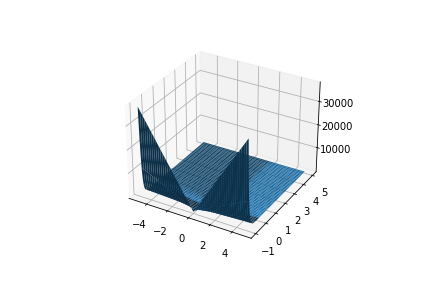

In [27]:
%matplotlib inline
ax = plt.subplot(projection='3d')
ax.plot_surface(A, B, JJ)

And try ro figure out what is the minimum and its corresponding $a$ and $b$:

In [28]:
m = np.argmin(JJ)
JJ.flatten()[m]
print('Cost function minimum: {0:,.3f} at a = {1:,.2f}, b = {2:,.2f}'.format(JJ.flatten()[m], A.flatten()[m], B.flatten()[m]))

Cost function minimum: 0.125 at a = 2.02, b = 0.45


And plot the resulting function:

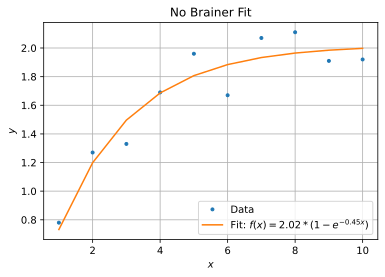

In [29]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
a, b = A.flatten()[m], B.flatten()[m]
plt.plot(x, y, lw=0, marker='.')
plt.plot(x, func(x, a, b))
plt.legend(('Data', 'Fit: $f(x) = {:0,.2f}*(1 - e^{{-{:1,.2f}x}})$'.format(a, b)))
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.title('No Brainer Fit')
plt.grid()

But now let's try to implement the Newton's method like real bad bois! But we'll switch to **mse** cost function as **rms** showed bad behavior and is too complex:

$$
J = \frac{1}{2n}\sum\limits_{i=1}^{n}{(f_i - y_i)^2},\\
\hspace{3mm}\\
\frac{\partial J}{\partial a} = \frac{1}{n}\sum\limits_{i=1}^{n}{\Big [(f_i - y_i)\frac{\partial f}{\partial a} \Big ]},\\
\hspace{3mm}\\
\frac{\partial J}{\partial b} = \frac{1}{n}\sum\limits_{i=1}^{n}{\Big [(f_i - y_i)\frac{\partial f}{\partial b} \Big ]},\\
\hspace{3mm}\\
H(J) = 
\begin{bmatrix}
\frac{\partial^2 J}{\partial a^2} & \frac{\partial^2 J}{\partial a \partial b}\\
\frac{\partial^2 J}{\partial b \partial a} & \frac{\partial^2 J}{\partial b^2}
\end{bmatrix}.
$$

In [30]:
def faa(x, a, b):

    return 0

def fbb(x, a, b):

    return -a*np.power(x, 2)*np.exp(-b*x)

def fab(x, a, b):

    return x*np.exp(-b*x)

def J(x, a, b, y):
    n = len(x)
    f = func(x, a, b)

    return 1/(2*n)*np.sum(np.power(f - y, 2))

def dJda(x, a, b, y):
    n = len(x)
    f = func(x, a, b)

    return 1/n*np.sum((f - y)*dfda(x, a, b))

def dJdb(x, a, b, y):
    n = len(x)
    f = func(x, a, b)

    return 1/n*np.sum((f - y)*dfdb(x, a, b))

def Jaa(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    fa = dfda(x, a, b)

    return 1/n * np.sum(fa*fa + (f - y)*faa(x, a, b))

def Jbb(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    fb = dfdb(x, a, b)

    return 1/n * np.sum(fb*fb + (f - y)*fbb(x, a, b))

def Jab(x, a, b, y):
    n = len(x)
    f = func(x, a, b)
    fa = dfda(x, a, b)
    fb = dfdb(x, a, b)
    f2 = fab(x, a, b)

    return 1/n * np.sum(fa*fb + f2*(f - y))

def grad(x, a, b):
    G = np.zeros(2)

    G[0] = dJda(x, a, b, y)
    G[1] = dJdb(x, a, b, y)

    return G



def HJ(x, a, b, y):
    H = np.zeros((2, 2))
    H[0][0] = Jaa(x, a, b, y)
    H[1][0] = H[0][1] = Jab(x, a, b, y)
    H[1][1] = Jbb(x, a, b, y)

    return H

Plotting **mse**:

In [31]:
a = np.arange(0, 4, 0.01)
b = np.arange(0, 4, 0.01)

A, B = np.meshgrid(a, b)

HH = np.zeros(A.shape)

for i in range(HH.shape[0]):
    for j in range(HH.shape[1]):
        HH[i][j] = J(x, A[i][j], B[i][j], y)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
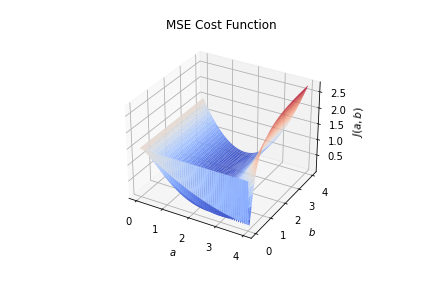

In [32]:
%matplotlib inline
from matplotlib import cm
ax = plt.subplot(projection='3d')
#ax.set_zlim(100)
#ax.set_xlim(2)
#ax.set_ylim(2)
ax.plot_surface(A, B, HH, cmap=cm.coolwarm)
ax.set_title('MSE Cost Function')
ax.set_xlabel('$a$')
ax.set_ylabel('$b$')
tmp = ax.set_zlabel('$J(a, b)$')

In [33]:
iters = 50000
target_accuracy = 0.005

points = np.zeros((iters, 2))

p0 = np.array([1, 1])

for i in range(iters):

    points[i, :] = p0

    inv = np.linalg.inv(HJ(x, p0[0], p0[1], y))

    scale = i if i else 1

    p = p0 - inv.dot(grad(x, p0[0], p0[1]))/np.sqrt(scale)/100

    if (J(x, p[0], p[1], y) > J(x, p[0], p[1], y)):
        print('Divergence started to occur at step {}'.format(i))
        print('J = {:0,.3f} at a={:1,.2f}, b={:2,.2f}'.format(J(x, p0[0], p0[1], y), p0[0], p0[1]))
        break

    if (J(x, p[0], p[1], y) < target_accuracy):
        print('Reasonable accuracy reached')
        print('J = {:0,.3f} at a={:1,.2f}, b={:2,.2f}'.format(J(x, p[0], p[1], y), p[0], p[1]))
        break

    p0 = p

if (i == iters-1):
    print('Iterations expired')
    print('J = {:0,.3f} at a={:1,.2f}, b={:2,.2f}'.format(J(x, p[0], p[1], y), p[0], p[1]))

    

Iterations expired
J = 0.008 at a=1.99, b=0.47


I assure the reader that iterations may be prolonged to achieve better results by the cost of time. However, the coefficients we received quite coincide with the no-brain fit method and lay prettily on the graph:

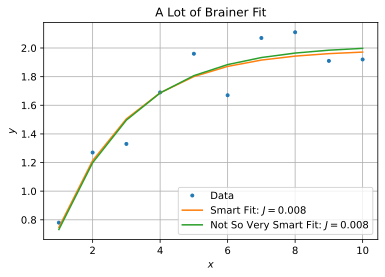

In [34]:
%matplotlib inline
plt.plot(x, y, lw=0, marker='.')
plt.plot(x, func(x, p[0], p[1]))
plt.plot(x, func(x, 2.02, 0.45))
plt.grid()
plt.title('A Lot of Brainer Fit')
plt.xlabel('$x$')
plt.ylabel('$y$')

tmp = plt.legend(('Data', 
            'Smart Fit: $J = {:0,.3f}$'.format(J(x, p0[0], p0[1], y)),
            'Not So Very Smart Fit: $J = {:0,.3f}$'.format(J(x, 2.02, 0.45, y))
        ))          

Mission accomplished!